In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed/Users/deanmendes/Dropbox/Dean Mendes-26992/Data Science, Algorithms and Advanced Software Engineering/Completed Tasks/Task 17/data1953.csv
# It is defined by the kaggle/python doc/Users/deanmendes/Dropbox/Dean Mendes-26992/Data Science, Algorithms and Advanced Software Engineering/Completed Tasks/Task 17/data2008.csvker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data2008.csv


In [2]:
# read in csv file of life expenctancy vs birth rate
Data = pd.read_csv('/kaggle/input/data2008.csv')
Data.head()

,Countries,BirthRate(Per1000 - 2008),LifeExpectancy(2008)
0,Afghanistan,46.613,47.532
1,Albania,14.690,76.492
2,Algeria,20.804,72.440
3,Angola,42.908,49.879
4,Argentina,17.372,75.387


## Data Exploration

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
Countries                    196 non-null object
BirthRate(Per1000 - 2008)    196 non-null float64
LifeExpectancy(2008)         196 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [4]:
Data.isnull().sum()

Countries                    0
BirthRate(Per1000 - 2008)    0
LifeExpectancy(2008)         0
dtype: int64

In [5]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
BirthRate(Per1000 - 2008),196.0,22.220633,10.820607,8.136,12.55825,20.0445,29.33750,54.053
LifeExpectancy(2008),196.0,69.091888,10.024387,46.119,63.90700,72.5125,76.10225,82.810


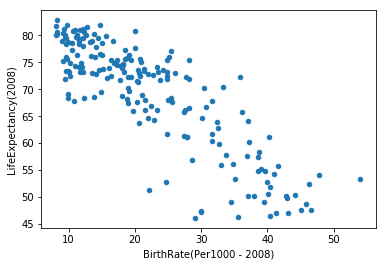

In [6]:
Data.plot(x='BirthRate(Per1000 - 2008)', y='LifeExpectancy(2008)', kind='scatter')
plt.show()

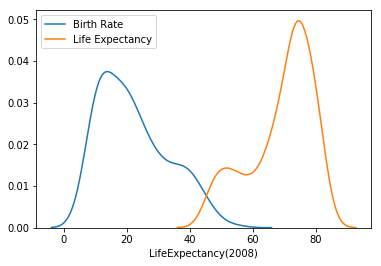

In [7]:
ax1 = sns.distplot(Data['BirthRate(Per1000 - 2008)'], hist=False, label='Birth Rate')
sns.distplot(Data['LifeExpectancy(2008)'], hist=False, label='Life Expectancy')
plt.show()

## Data Preprocessing 

1) Create new dataframe for preprocessing
2) Drop unnecessary columns  
3) Create scaled object of X, Y

In [8]:
# dropping column of countries
df = Data.copy(deep=True)
df.drop(columns='Countries', inplace = True)
df.head()

,BirthRate(Per1000 - 2008),LifeExpectancy(2008)
0,46.613,47.532
1,14.690,76.492
2,20.804,72.440
3,42.908,49.879
4,17.372,75.387


In [9]:
# create x and y variable then joining them together to scale
# X varibale of birthrate
X = df.iloc[:,0].values
print(X[:5])

# Y variable of life expectancy
Y = df.iloc[:, 1].values
print(Y[:5])

# Z object to be scaled
Z = np.array(list(zip(X,Y)))
Z[:5]

[46.613 14.69  20.804 42.908 17.372]
[47.532 76.492 72.44  49.879 75.387]


array([[46.613, 47.532],
       [14.69 , 76.492],
       [20.804, 72.44 ],
       [42.908, 49.879],
       [17.372, 75.387]])

In [10]:
# import StandardScaler from sklearns preprocessing library to scaled Z object
from sklearn.preprocessing import StandardScaler

# scale object
scale = StandardScaler()
# fit and transform Z
Z_scaled = scale.fit_transform(Z)
Z_scaled[:5]

array([[ 2.26002413, -2.15625136],
       [-0.69773513,  0.74010135],
       [-0.13125516,  0.334852  ],
       [ 1.91674505, -1.92152277],
       [-0.44923999,  0.62958789]])

*Visualize effects of scaling data using distribution plot*

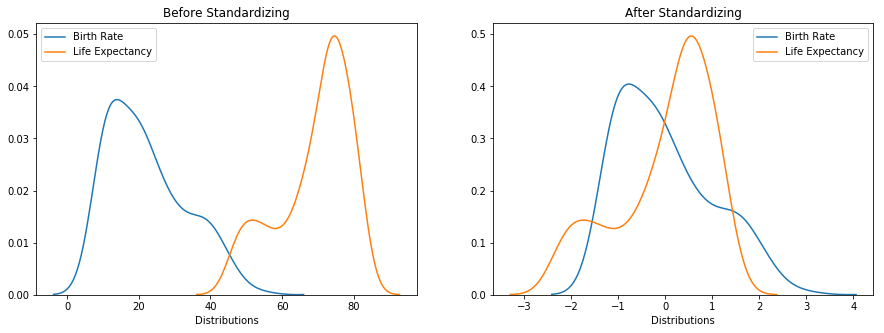

In [11]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)   # before standard
ax2 = fig.add_subplot(1,2,2)   # after standard

# first plot before standardizing
sns.distplot(df['BirthRate(Per1000 - 2008)'], hist=False, label='Birth Rate', ax=ax1)
sns.distplot(df['LifeExpectancy(2008)'], hist=False, label='Life Expectancy', ax=ax1)
ax1.set_title('Before Standardizing')
ax1.set_xlabel('Distributions')

# second plot (after standardizing)
sns.distplot(Z_scaled[:,0], hist=False, label='Birth Rate', ax=ax2)
sns.distplot(Z_scaled[:,1], hist=False, label='Life Expectancy', ax=ax2)
ax2.set_title('After Standardizing')
ax2.set_xlabel('Distributions')
plt.legend()
plt.show()



## Implementing k-mean algorithm  

1) Find best value for k using elbow method  
2) Create k-mean model with best value for k and visualize results

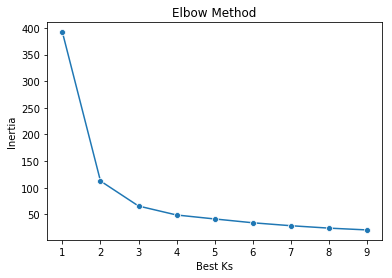

In [12]:
# import necessary libraries
from sklearn.cluster import KMeans

# values for k 
K_range = range(1,10)

# wcss / inertia property (tendency of to remain unchanged)
wcss = []

# for looop to find the best value for k
for i in K_range:
    
    # kmean object
    kmean = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # fit kmean object with scaled data
    kmean.fit(Z_scaled)
    
    # fill in wcss variable
    wcss.append(kmean.inertia_)
    
# visualize effect of the above loop
sns.lineplot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Best Ks')
plt.ylabel('Inertia')
plt.show()

*By the above result, the best value for K is 2*

In [13]:
# build model using k=2 clusters
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(Z_scaled)

# labels ie the labels that each row is categorized under
labels = km.labels_
# add label category to initial dataframe
Data['Labels'] = labels

# centroids
centroids = km.cluster_centers_

# ensure labels is now a column
Data.head()

,Countries,BirthRate(Per1000 - 2008),LifeExpectancy(2008),Labels
0,Afghanistan,46.613,47.532,1
1,Albania,14.690,76.492,0
2,Algeria,20.804,72.440,0
3,Angola,42.908,49.879,1
4,Argentina,17.372,75.387,0


## Visualize Final Cluster Model

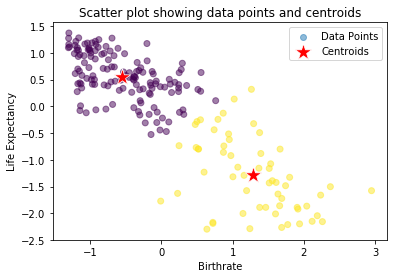

In [14]:
# scatter data points
ax1 = plt.scatter(Z_scaled[:,0], Z_scaled[:,1], 
                  marker='o', alpha=.5, 
                  c=labels.astype(float), label='Data Points')

# plot centroids
sns.scatterplot(centroids[:,0], centroids[:,1], 
                marker='*', s=300, color='r', 
                label='Centroids')

plt.title('Scatter plot showing data points and centroids')
plt.xlabel('Birthrate')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()